In [14]:
import pandas as pd

In [15]:
fatalities = pd.read_csv('https://raw.githubusercontent.com/UN-ICC/ICC-Data-Hackathon-2021/main/Refugee%20Crisis/fatalities.csv')
forciby_displaced = pd.read_csv('https://raw.githubusercontent.com/UN-ICC/ICC-Data-Hackathon-2021/main/Refugee%20Crisis/forciby_displaced.csv', encoding='latin-1')
terrain_info = pd.read_csv('https://raw.githubusercontent.com/UN-ICC/ICC-Data-Hackathon-2021/main/Refugee%20Crisis/terrain_info.csv', encoding='latin-1')
dist_cepii = pd.read_stata('https://raw.githubusercontent.com/UN-ICC/ICC-Data-Hackathon-2021/main/Refugee%20Crisis/dist_cepii.dta')
geo_cepii = pd.read_stata('https://raw.githubusercontent.com/UN-ICC/ICC-Data-Hackathon-2021/main/Refugee%20Crisis/geo_cepii.dta')

In [16]:
fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518 entries, 0 to 1517
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1518 non-null   int64 
 1   year              1518 non-null   int64 
 2   iso_o             1518 non-null   object
 3   Country           1518 non-null   object
 4   Fatalities_acled  1518 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 59.4+ KB


In [17]:
import matplotlib.pyplot as plt

In [18]:
plt.style.use('seaborn-whitegrid')


In [19]:
total_fatalities = fatalities.groupby('year').sum('Fatalities_acled')

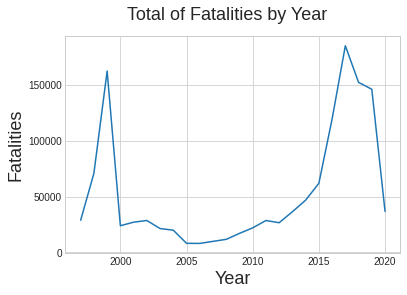

In [20]:
fig = plt.figure()
ax = plt.axes()

plt.rc('font', size=18)

fig.suptitle('Total of Fatalities by Year', fontsize=18)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Fatalities", fontsize=18)


ax.plot(total_fatalities.index, total_fatalities['Fatalities_acled']);




---



In [21]:
total_forciby_displaced = forciby_displaced.groupby('Year').sum()

In [22]:
total_forciby_displaced

,Unnamed: 0,REF,IDP,ASY
Year,,,,
1951,253,2116011.0,0.0,0
1952,567,1252928.0,0.0,0
1953,891,1347304.0,0.0,0
1954,1449,1249628.0,0.0,0
1955,1496,1217966.0,0.0,0
...,...,...,...,...
2015,395630091,16110280.0,37494172.0,3223460
2016,419051204,17184291.0,36627127.0,2729521
2017,461649750,19940568.0,39118516.0,3089503


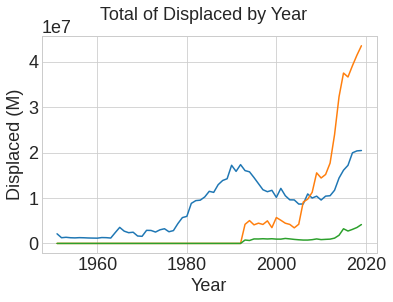

In [23]:
fig = plt.figure()
ax = plt.axes()

plt.rc('font', size=18)

fig.suptitle('Total of Displaced by Year', fontsize=18)
plt.xlabel("Year", fontsize=18)
plt.ylabel("Displaced (M)", fontsize=18)

ax.plot(total_forciby_displaced.index, total_forciby_displaced['REF']);
ax.plot(total_forciby_displaced.index, total_forciby_displaced['IDP']);
ax.plot(total_forciby_displaced.index, total_forciby_displaced['ASY']);




---



In [24]:
import plotly.express as px

In [25]:
fatalities_last_4 = fatalities[(fatalities.year > 2010) & (fatalities.year <= 2020)].groupby('Country').sum('Fatalities_acled')
fatalities_last_4['Country'] = fatalities_last_4.index

fig = px.choropleth(fatalities_last_4, locations="Country", 
                    locationmode='country names', color="Fatalities_acled", 
                    hover_name="Country",
                    color_continuous_scale="dense", 
                    title='Fatalities of Countries in 2011-2020')
fig.update(layout_coloraxis_showscale=True)
fig.show()

In [26]:
fatalities_last_3 = fatalities[(fatalities.year > 2000) & (fatalities.year <= 2010)].groupby('Country').sum('Fatalities_acled')
fatalities_last_3['Country'] = fatalities_last_3.index

fig = px.choropleth(fatalities_last_3, locations="Country", 
                    locationmode='country names', color="Fatalities_acled", 
                    hover_name="Country",
                    color_continuous_scale="dense", 
                    title='Fatalities of Countries in 2001-2010')
fig.update(layout_coloraxis_showscale=True)
fig.show()

In [27]:
fatalities_last_2 = fatalities[(fatalities.year > 1990) & (fatalities.year <= 2000)].groupby('Country').sum('Fatalities_acled')
fatalities_last_2['Country'] = fatalities_last_2.index

fig = px.choropleth(fatalities_last_2, locations="Country", 
                    locationmode='country names', color="Fatalities_acled", 
                    hover_name="Country",
                    color_continuous_scale="dense", 
                    title='Fatalities of Countries in 1991-2000')
fig.update(layout_coloraxis_showscale=True)
fig.show()

In [28]:
fatalities_last_1 = fatalities[(fatalities.year > 1980) & (fatalities.year <= 1990)].groupby('Country').sum('Fatalities_acled')
fatalities_last_1['Country'] = fatalities_last_1.index

fig = px.choropleth(fatalities_last_1, locations="Country", 
                    locationmode='country names', color="Fatalities_acled", 
                    hover_name="Country",
                    color_continuous_scale="dense", 
                    title='Fatalities of Countries in 1981-1990')
fig.update(layout_coloraxis_showscale=True)
fig.show()



---



In [29]:
fatalities_last_4.sort_values(by=['Fatalities_acled'], ascending=False)

,Unnamed: 0,year,Fatalities_acled,Country
Country,,,,
Afghanistan,4777,8074,126320,Afghanistan
Yemen,7245,12105,114739,Yemen
Syrian Arab Rep.,5169,8074,103094,Syrian Arab Rep.
Iraq,5970,10090,97907,Iraq
Nigeria,10286,20155,55952,Nigeria
...,...,...,...,...
Saint Lucia,2756,4039,0,Saint Lucia
Bulgaria,3764,6057,0,Bulgaria
British Virgin Islands,2880,4039,0,British Virgin Islands


In [30]:
fatalities_last_3.sort_values(by=['Fatalities_acled'], ascending=False)

,Unnamed: 0,year,Fatalities_acled,Country
Country,,,,
Sudan,4447,20055,45658,Sudan
Dem. Rep. of the Congo,4171,20055,24110,Dem. Rep. of the Congo
Ethiopia,4231,20055,14054,Ethiopia
Somalia,4477,20055,12538,Somalia
Nigeria,4425,20055,12322,Nigeria
Angola,4090,20055,9533,Angola
Burundi,4100,20055,9464,Burundi
Uganda,4538,20055,8986,Uganda
Pakistan,665,2010,8126,Pakistan


In [31]:
fatalities_last_2.sort_values(by=['Fatalities_acled'], ascending=False)

,Unnamed: 0,year,Fatalities_acled,Country
Country,,,,
Angola,292,7994,133926,Angola
Eritrea,344,7994,53648,Eritrea
Ethiopia,348,7994,21288,Ethiopia
Dem. Rep. of the Congo,324,7994,16963,Dem. Rep. of the Congo
Sudan,432,7994,14711,Sudan
Burundi,296,7994,10989,Burundi
Nigeria,424,7994,6895,Nigeria
Algeria,336,7994,6606,Algeria
Rwanda,428,7994,6152,Rwanda
